<a href="https://www.kaggle.com/code/paccysangmailcom/ml-classifier-comparison?scriptVersionId=285586514" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer-wisconsin-data/data.csv
/kaggle/input/wine-quality-dataset/WineQT.csv
/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite


In [2]:
import warnings
import sklearn.exceptions

# 1. Ignore all general warnings
warnings.filterwarnings('ignore') 

# 2. Ignore specific deprecation warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# 3. Ignore specific scikit-learn warnings often seen in classification reports
warnings.filterwarnings('ignore', category=sklearn.exceptions.UndefinedMetricWarning)

In [3]:
import warnings
import sklearn.exceptions

# Ignore all general warnings
warnings.filterwarnings('ignore') 
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=sklearn.exceptions.UndefinedMetricWarning)

In [4]:
# Import datasets
from sklearn.datasets import make_moons

breast_cancer = pd.read_csv("/kaggle/input/breast-cancer-wisconsin-data/data.csv")
iris = pd.read_csv("/kaggle/input/iris/Iris.csv")
wine_quality = pd.read_csv("/kaggle/input/wine-quality-dataset/WineQT.csv")
moons_X, moons_Y = make_moons(n_samples=200, noise=0.2, random_state=42)

# EDA

## Moons

In [5]:
moons_X.shape

(200, 2)

## Breat Cancer Dataset

In [6]:
breast_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [7]:
breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [8]:
# Drop unnecessary columns
breast_cancer.drop(["id", "Unnamed: 32"], axis=1, inplace=True)

In [9]:
breast_cancer_X = breast_cancer.drop("diagnosis", axis=1)
breast_cancer_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se            5

In [10]:
breast_cancer["diagnosis"].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

- A binary classification between B and M
- **B: Benign** means a tumor is non-cancerous and does not spread to other parts of the body
- **M: Malignant** means it is cancerous and can invade surrounding tissues and spread to distant parts of the body (metastasize)

In [11]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

label_encoder = LabelEncoder()
breast_cancer_Y = pd.Series(label_encoder.fit_transform(breast_cancer["diagnosis"]))
breast_cancer_Y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Length: 569, dtype: int64

## 

## Iris Dataset

In [12]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [13]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [14]:
# drop the unnecessary ID column
iris.drop('Id',axis=1,inplace=True)

In [15]:
iris["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

- Multi-class classification. 3 classes.

In [16]:
iris_X = iris.drop(["Species"], axis=1)
iris_X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [17]:
one_hot_encoder = OneHotEncoder()
data = iris["Species"].values.reshape(-1, 1)
iris_Y = one_hot_encoder.fit_transform(data)
names = one_hot_encoder.get_feature_names_out(["Species"])
iris_Y = np.asarray(np.argmax(iris_Y, axis=1))
iris_Y[:5]

array([[0],
       [0],
       [0],
       [0],
       [0]])

## Wine Quality

In [18]:
wine_quality.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [19]:
wine_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [20]:
# Drop unnecessary Id column
wine_quality.drop("Id", axis=1, inplace=True)

In [21]:
wine_quality_X = wine_quality.drop("quality", axis=1)
wine_quality_X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2


In [22]:
wine_quality_Y = wine_quality["quality"]
wine_quality_Y

0       5
1       5
2       5
3       6
4       5
       ..
1138    6
1139    6
1140    5
1141    6
1142    5
Name: quality, Length: 1143, dtype: int64

In [23]:
# Import 
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

from mlxtend.plotting import plot_decision_regions

# Classic Machine Learning Classifiers with Scikit-Learn

## MLClassifierComparator Class

In [24]:
class MLClassifierComparator:
    """
    A class that applies two classification machine learning algorithms, SVM and KNN 
    and compares the performance of both based on key metrics.
    """
    def __init__(self, X: np.ndarray, Y: np.ndarray, models: dict, dataset_name: str) -> None:
        self.X = X
        self.Y = Y
        self.models = models # model_name: Untrained GridSearchCV
        self.training_results =  {} # name: GridSearchCV results
        self.dataset_name = dataset_name
        
        self.Y = self.Y.ravel() # flatten Y
        self._train()

    def _train(self):
        """
        Step 1
            - split the data

        Step 2
            - Train the data
            - Train all models we have
        """
        # Split the data
        self.X_train, self.X_test, self.Y_train, self.Y_test = train_test_split(self.X, self.Y, test_size=0.2, random_state=42)

        # Pipeline: Scaling -> Apply ML Classifier
        for model_name, grid_search in self.models.items():
            grid_search.fit(self.X_train, self.Y_train)
            self.training_results[model_name] = {}
            self.training_results[model_name]["fitted_grid_search"] = grid_search
            self.training_results[model_name]["Y_pred"] =  self.training_results[model_name]["fitted_grid_search"].best_estimator_.predict(self.X_test)
        
    def get_metrics(self):
        for model_name, fitted_grid_search in self.training_results.items():
            print(f"\n\n--- Dataset: {self.dataset_name} | Model: {model_name} ---") 
            print(f"{model_name} Classification Report: \n", classification_report(self.Y_test, fitted_grid_search["Y_pred"]))
        
    def plot_confusion_matrix(self):
        unique_labels = np.unique(self.Y)
        for model_name, fitted_grid_search in self.training_results.items():   
            print(f"\n\n--- Confusion Matrix: {self.dataset_name} | Model: {model_name} ---")
            cm = confusion_matrix(self.Y_test, fitted_grid_search["Y_pred"], labels=unique_labels)
            fig, ax = plt.subplots(figsize=(6, 6)) 

            display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_labels)
            display.plot(ax=ax)

            filename = f"CM_{self.dataset_name.replace(' ', '_')}_{model_name}.png"
            plt.savefig(filename, dpi=600)
            
            plt.show()
            plt.close(fig)
        
    def training_time(self):
        """
        - Cross Validation with GridSearchCV
            - Plot raw values
                - Mean Fit Times
                - Mean Score Times
                - Use the respective standard deviations as error bars
        """

        # Plot raw values
        for model_name, results in self.training_results.items():
            length = len(results["fitted_grid_search"].cv_results_["mean_fit_time"])
            x = np.arange(length)
            mean_fit_time = results["fitted_grid_search"].cv_results_["mean_fit_time"]
            std_fit_time = results["fitted_grid_search"].cv_results_["std_fit_time"]
            mean_score_time = results["fitted_grid_search"].cv_results_["mean_score_time"]
            std_score_time = results["fitted_grid_search"].cv_results_["std_score_time"]

            mean_times = {
                "fit_time": {
                     "mean": mean_fit_time,
                     "std": std_fit_time
                },

                "score_time" : {
                     "mean": mean_score_time,
                     "std": std_score_time
                },
            }

            fig, ax = plt.subplots(figsize=(8,6), layout="constrained")

            width = 0.25
            multiplier = 0

            for time, metrics in mean_times.items():
                offset = width * multiplier
                attribute = f"Mean {time.split('_')[0]} Time"
                mean, std = metrics["mean"], metrics["std"]
                rects = ax.bar(x + offset, mean, width, yerr=std, capsize=2, label=attribute)
                multiplier += 1

            ax.set_ylabel("Time (s)")
            ax.set_xlabel("Nth Candidate")
            ax.set_title(f"Shoulder to Shoulder Vizualization of Mean Fit Time and Mean Score Time using {model_name} on the {self.dataset_name} Dataset")
            ax.set_xticks(x + width, x)
            ax.legend(loc="upper left", ncols=length)
            plt.style.use("dark_background")

            filename = f"Time_{self.dataset_name.replace(' ', '_')}_{model_name}.png"
            plt.savefig(filename, dpi=600)
            
            plt.show()
            plt.style.use("default")
            plt.close(fig)
    
    def plot_decision_boundary(self):
        """
        - Retrains with PCA to make the X be a 2D
        - Plots the decision boundary for 
        """
        n_models = len(self.training_results)
        fig, axes = plt.subplots(n_models // 2, 2, figsize=(12, 6))
        axes = axes.flatten()
        
        idx = 0
        for model_name, fitted_grid_search_dict in self.training_results.items():
            fitted_grid_search = fitted_grid_search_dict["fitted_grid_search"]
            original_best_pipeline = fitted_grid_search.best_estimator_
            current_steps = original_best_pipeline.steps
            
            pca = PCA(n_components=2)
            
            new_step = ("pca", pca)
            new_steps = current_steps[:1] + [new_step] + current_steps[1:]
            
            new_pipeline = Pipeline(new_steps)
            new_pipeline.fit(self.X, self.Y)

            X_2d = new_pipeline[:-1].transform(self.X)
            final_classifier = new_pipeline[-1]        

            plot_decision_regions(
                X=X_2d,
                y=self.Y,
                clf=final_classifier,
                ax=axes[idx],
                legend=0,
                scatter_kwargs={"s": 40, "edgecolor": "k", "alpha": 0.8}
            )

            axes[idx].set_title(f'{model_name} Decision Boundary')
            axes[idx].set_xlabel("Principal Component 1")
            axes[idx].set_ylabel("Principal Component 2")

            filename = f"DB_Composite_{self.dataset_name.replace(' ', '_')}.png"
            plt.savefig(filename, dpi=600)
            
            idx += 1

        plt.suptitle("Comparison of Decision Boundaries (Visualized on PC1 vs PC2)", fontsize=16)
        plt.tight_layout(rect=[0, 0, 1, 0.96])
        plt.show()
        plt.close(fig)


    def present_findings(self):
        """
        Runs the methods needed for the presentation on a dataset
        """
        comparator.get_metrics()
        comparator.plot_confusion_matrix()
        print("\n\n")
        comparator.training_time()
        comparator.plot_decision_boundary()

## KNN and SVM Parameter Definition

In [25]:
# KNN Pipeline
knn_param_grid = {
    "knn__n_neighbors": [1, 3, 5, 7, 9, 11]
}
knn_pipeline = Pipeline(
    [("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier())]
)

knn_grid_search = GridSearchCV(knn_pipeline, knn_param_grid, cv=5)

In [26]:
# SVM Pipeline
svm_param_grid = {
    "svm__C": [1, 10, 100, 1000], "svm__kernel": ["linear", "rbf", "poly"]
}
svm_pipeline = Pipeline(
    [("scaler", StandardScaler()),
    ("svm", SVC(random_state=42))]
)
svm_grid_search = GridSearchCV(svm_pipeline, svm_param_grid, cv=5)

models = {
    "KNN": knn_grid_search,
    "SVM": svm_grid_search
}

# Deep Neural Network Classifier implemented with PyTorch

## Deep Neural Network Definition

In [27]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class NNClassifier(nn.Module):
    """
    A simple Deep Neural Network Classifier that uses ReLU activation
    """
    def __init__(self, input_size: int, output_size: int):
        super(NNClassifier, self).__init__()

        self.fc1 = nn.Linear(input_size, 16)
        self.fc2 = nn.Linear(16, 16)
        self.fc3 = nn.Linear(16, output_size)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = torch.flatten(x, 1)

        # Hidden layers with ReLU activation
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))

        # Final layer (raw logits)
        x = self.fc3(x)
        
        return x

### Wrapper class to facilitate vizualization

In [28]:
class PredictAdapter:
    """A wrapper class to make a PyTorch function compatible with mlextend's plot_decision_boundary() method."""
    def __init__(self, predict_func):
        self.predict_func = predict_func
    
    def predict(self, X):
        return self.predict_func(X)

    def fit(self, X, y=None): 
        return self

In [29]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset
import time

## NNClassifier Driver Class

In [30]:
class NNClassifierDriver:
    """
    A driver class to manage the training, evaluation, and visualization 
    of a PyTorch-based Neural Network Classifier 
    """
    def __init__(self, input_size: int, num_classes: int):
        self.BATCH_SIZE = 32
        self.N_EPOCHS = 1000
        self.training_time = 0.0

        # Device set
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # NEW LINE 1
        print(f"Using device: {self.device}")

        # Define the model, loss, and optimizer
        self.net = NNClassifier(input_size, num_classes)
        self.criterion = nn.CrossEntropyLoss()
        self.optimizer = optim.Adam(self.net.parameters(), lr=0.01) 

        # Move model and loss to device
        self.net.to(self.device)                                                  # NEW LINE 3: Move model
        self.criterion.to(self.device)
        
        # Targert class paceholders
        self.Y_pred = None
        self.Y_test = None

        # Data holder for PCA plotting
        self.X_original = None 
        self.Y_original = None 
        
    def load_dataset(self, X_original: np.ndarray, Y_original: np.ndarray):
        """Loads and prepares the data, storing original arrays and creating DataLoaders."""
        
        # Store original data for PCA plotting later
        self.X_original = X_original
        Y_temp = Y_original.ravel().astype(np.int64)
        min_label = Y_temp.min()
        if min_label != 0:
            print(f"Warning: Re-indexing labels from minimum value {min_label} to 0.")
            Y_temp = Y_temp - min_label
            
        self.Y_original = Y_temp
        # Split the data
        X_train, X_test, Y_train, Y_test = train_test_split(
            self.X_original, self.Y_original, test_size=0.2, random_state=42
        )
        
        # Convert to Tensors and Datasets
        train_tensors = (torch.from_numpy(X_train).float(), torch.from_numpy(Y_train).long())
        test_tensors = (torch.from_numpy(X_test).float(), torch.from_numpy(Y_test).long())
        
        train_dataset = TensorDataset(*train_tensors)
        test_dataset = TensorDataset(*test_tensors)
        
        # Create DataLoaders
        self.trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=self.BATCH_SIZE, shuffle=True, num_workers=0)
        self.testloader = torch.utils.data.DataLoader(test_dataset, batch_size=self.BATCH_SIZE, shuffle=False)

    def train(self):
        """Executes the full PyTorch training loop."""
        running_loss = 0.0
        start_time = time.perf_counter()
        
        for epoch in range(self.N_EPOCHS):
            self.net.train()
            for i, data in enumerate(self.trainloader, 0):
                inputs, labels = data

                # Move the data to device
                inputs = inputs.to(self.device)                                    # NEW LINE 5
                labels = labels.to(self.device)

                # Ignore previous gradients
                self.optimizer.zero_grad()

                # Forward feed(calculate logits)
                self.outputs = self.net(inputs)

                # Calculate loss
                loss = self.criterion(self.outputs, labels)
                
                # Backpropagation (derivative of loss fx wrt to weights and biases)
                loss.backward()

                # Update weights and biases
                self.optimizer.step()
                running_loss += loss.item() 
                if i % 100 == 99:
                    print(f"Epoch {epoch + 1}, Batch {i + 1} loss: {running_loss / 100:.3f}")
                    running_loss = 0.0
        
        end_time = time.perf_counter()
        self.training_time = end_time - start_time
        print("Finished training")
        print(f"Total Training Duration: {self.training_time:.4f} seconds")

    def predict(self):
        """Run prediction on the test set and convert results to NumPy arrays."""
        # Set to prediction mode
        self.net.eval()
        all_predicted = []
        all_labels = []

        # Disable gradients
        with torch.no_grad():
            for inputs, labels in self.testloader:
                # Move data to device
                inputs = inputs.to(self.device)                                    
                labels = labels.to(self.device)
                outputs = self.net(inputs)
                _, predicted = torch.max(outputs.data, 1) # Choose class with the highest probability
                all_predicted.append(predicted.detach().cpu().numpy())
                all_labels.append(labels.detach().cpu().numpy())

        self.Y_pred = np.concatenate(all_predicted)
        self.Y_test = np.concatenate(all_labels) 
        print("Prediction on test set complete.")

    def save_model(self):
        """Save the model's state dictionary."""
        PATH = "/models/nn_model.pth"
        torch.save(self.net.state_dict(), PATH)
        print(f"Model weights saved to {PATH}") 

    def get_metrics(self):
        """Prints the classification report using predicted results."""
        if self.Y_pred is None: self.predict()
        print("\nNN Classification Report: \n", classification_report(self.Y_test, self.Y_pred))

    def plot_confusion_matrix(self):
        """Plots the confusion matrix."""
        if self.Y_pred is None: self.predict()
        cm = confusion_matrix(self.Y_test, self.Y_pred)
        fig, ax = plt.subplots(figsize=(6, 6)) 
        display = ConfusionMatrixDisplay(confusion_matrix=cm)
        
        filename = f"CM_NN_{self.X_original.shape[1]}Features.png"
        plt.savefig(filename, dpi=600)
        
        display.plot(ax=ax)
        plt.show()
        plt.close(fig)

    def train_2d_net(self, X_2d, Y_original, num_classes, n_epochs=500, lr=0.01):
        """Trains a new NNClassifier instance specifically on 2D data (PCA output)."""
        
        # Instantiate a new network designed for 2 features
        net_2d = NNClassifier(input_size=2, output_size=num_classes)
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(net_2d.parameters(), lr=lr) # Use Adam for faster convergence

        # Move model and optimizer to device
        net_2d.to(self.device)
        criterion.to(self.device)
        
        # Convert data to PyTorch Tensors and DataLoader
        X_tensor = torch.from_numpy(X_2d).float()
        Y_tensor = torch.from_numpy(Y_original).long()
        dataset = torch.utils.data.TensorDataset(X_tensor, Y_tensor)
        loader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)
        
        # Training Loop (reduced epochs needed for simple 2D boundary learning)
        net_2d.train()
        for epoch in range(n_epochs):
            for inputs, labels in loader:

                # Move data to device
                inputs = inputs.to(self.device)                                    
                labels = labels.to(self.device)
                
                optimizer.zero_grad()
                outputs = net_2d(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()
                
        return net_2d

    def plot_decision_boundary(self):
        """
        Plots the decision boundary by training a separate 2D network on PCA output to simplify the vizualization
        """
        if self.X_original is None:
            print("Error: Load data first using load_dataset()")
            return
            
        # PCA Transformation
        pca = PCA(n_components=2)
        X_2d = pca.fit_transform(self.X_original)
        
        # Train the 2D Classifier 
        num_classes = len(np.unique(self.Y_original))
        net_2d_trained = self.train_2d_net(X_2d, self.Y_original, num_classes)
        
        # NN Adapter Function (Wraps the NEW 2D net)
        def nn_adapter_2d(X_np):
            net_2d_trained.eval()
            with torch.no_grad():
                X_tensor = torch.from_numpy(X_np).float()
                X_tensor = X_tensor.to(self.device)
                outputs = net_2d_trained(X_tensor) 
                _, predicted = torch.max(outputs.data, 1)
            return predicted.cpu().numpy()
    
        clf_wrapper = PredictAdapter(nn_adapter_2d) 
        fig, ax = plt.subplots(1, 1, figsize=(8, 6))
    
        plot_decision_regions(
            X=X_2d,
            y=self.Y_original, 
            clf=clf_wrapper,
            ax=ax,
            legend=2,
            scatter_kwargs={"s": 40, "edgecolor": "k", "alpha": 0.8}
        )
    
        ax.set_title("Neural Network Decision Boundary (2D Projection)")
        ax.set_xlabel("Principal Component 1")
        ax.set_ylabel("Principal Component 2")
        
        filename = f"DB_NN_{self.X_original.shape[1]}Features.png"
        plt.savefig(filename, dpi=600)

        plt.show()
        plt.close(fig)

    def present_findings(self, X_original, Y_original, dataset_name):
        """
        Calls the appropriate methods to present the findings 
        """
        self.load_dataset(X_original, Y_original) 
        self.dataset_name = dataset_name
        self.train()
        self.predict()
        
        print("\n=== PyTorch NN Findings ===")
        self.get_metrics() 
        self.plot_confusion_matrix()
        
        print(f"Training Time (PyTorch): {self.training_time:.4f} seconds") 
        self.plot_decision_boundary()

## Showcase the results

In [31]:
datasets = [ 
    # ("Wine Quality", wine_quality_X, wine_quality_Y),
    ("Moons", moons_X, moons_Y),
    ("Breast Cancer", breast_cancer_X, breast_cancer_Y), 
    ("Iris", iris_X, iris_Y), 
]


==================== PROCESSING Moons DATASET ====================

--- Running Scikit-learn Models (SVM/KNN) ---

--- Running PyTorch Neural Network ---
Using device: cuda
Finished training
Total Training Duration: 7.8531 seconds
Prediction on test set complete.

=== PyTorch NN Findings ===

NN Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.95      0.93        22
           1       0.94      0.89      0.91        18

    accuracy                           0.93        40
   macro avg       0.93      0.92      0.92        40
weighted avg       0.93      0.93      0.92        40



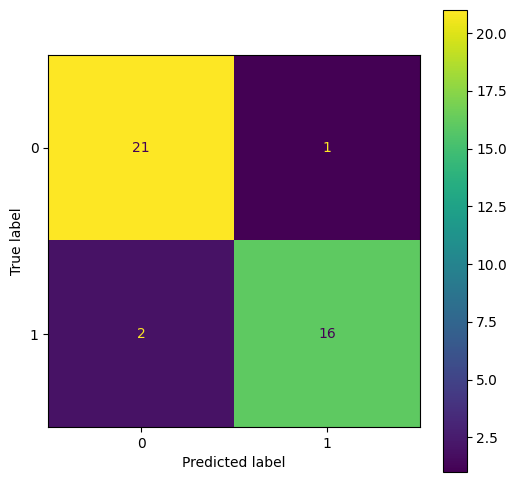

Training Time (PyTorch): 7.8531 seconds


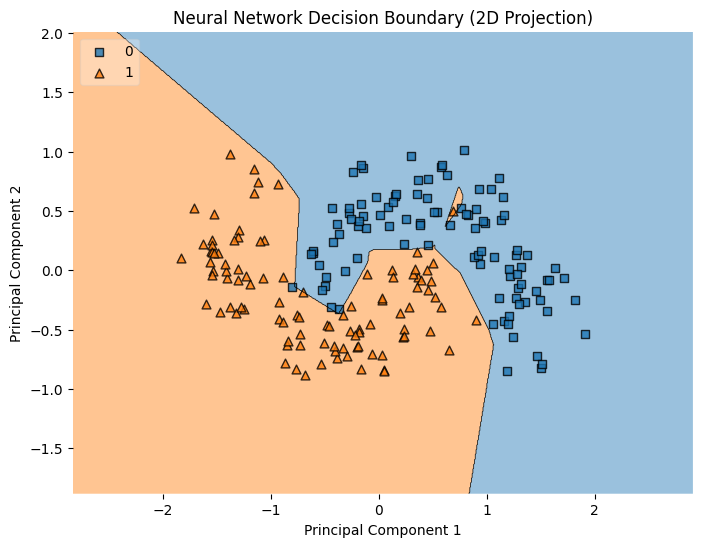

==================== FINISHED Moons DATASET ====================


==================== PROCESSING Breast Cancer DATASET ====================

--- Running Scikit-learn Models (SVM/KNN) ---

--- Running PyTorch Neural Network ---
Using device: cuda
Finished training
Total Training Duration: 22.3949 seconds
Prediction on test set complete.

=== PyTorch NN Findings ===

NN Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



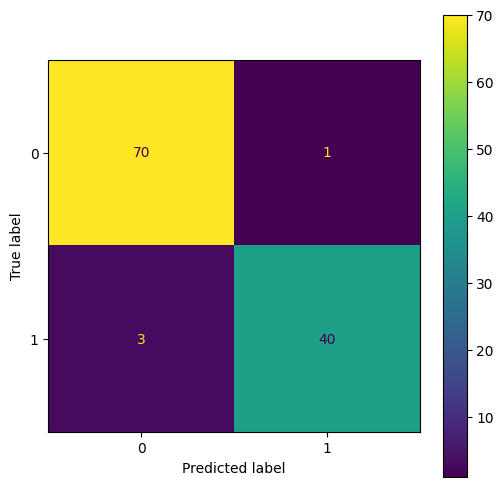

Training Time (PyTorch): 22.3949 seconds


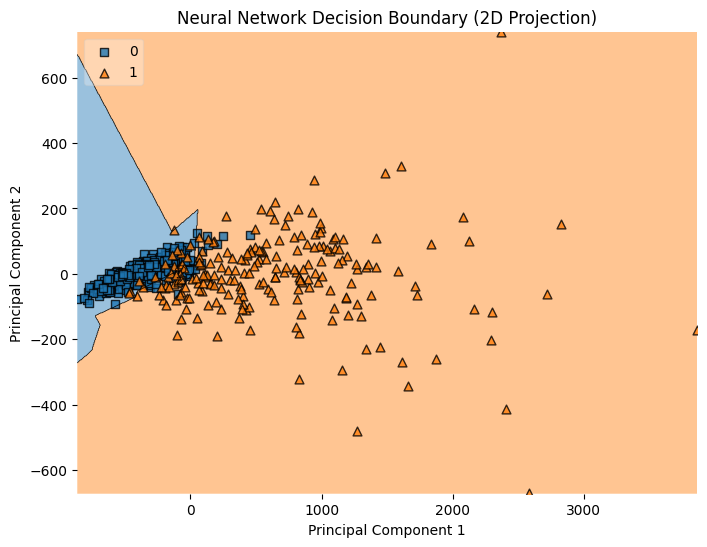

==================== FINISHED Breast Cancer DATASET ====================


==================== PROCESSING Iris DATASET ====================

--- Running Scikit-learn Models (SVM/KNN) ---

--- Running PyTorch Neural Network ---
Using device: cuda
Finished training
Total Training Duration: 6.0047 seconds
Prediction on test set complete.

=== PyTorch NN Findings ===

NN Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



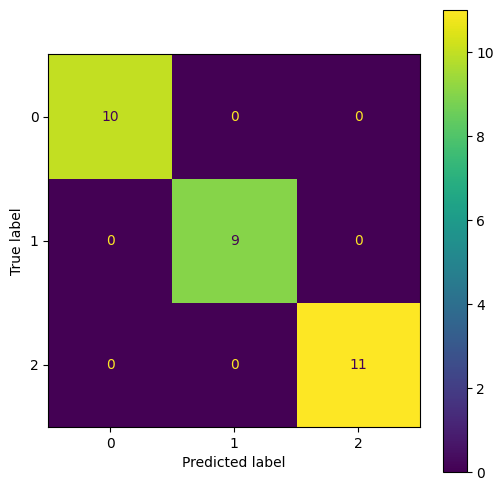

Training Time (PyTorch): 6.0047 seconds


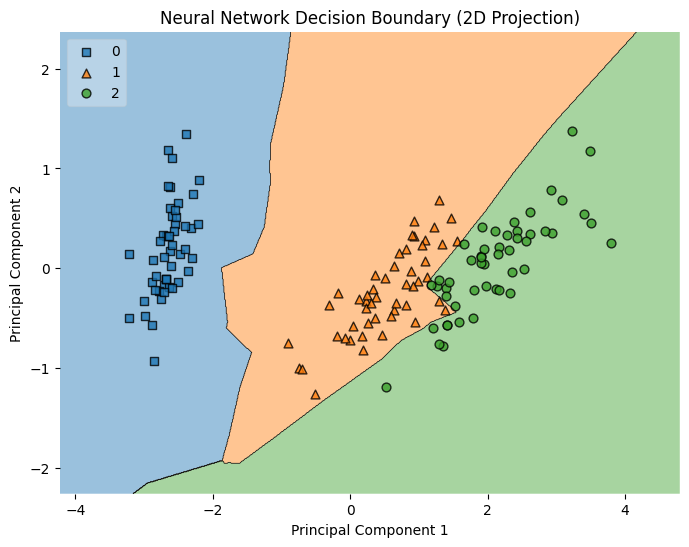

==================== FINISHED Iris DATASET ====================



In [32]:
for dataset_name, X_data, Y_data in datasets: 
    
    # Standardize input: convert to numpy 
    if isinstance(X_data, (pd.Series, pd.DataFrame)):
        X_original = X_data.to_numpy()
    else:
        X_original = X_data

    if isinstance(Y_data, (pd.Series, pd.DataFrame)):
        Y_original = Y_data.to_numpy().ravel().astype(np.int64)
    else:
        Y_original = Y_data.ravel().astype(np.int64)

    print(f"\n==================== PROCESSING {dataset_name} DATASET ====================") # FIX 2: Use name

    # Run Scikit-learn Models (SVM + KNN) 
    print("\n--- Running Scikit-learn Models (SVM/KNN) ---")
    comparator = MLClassifierComparator(X_original, Y_original, models, dataset_name=dataset_name)
    # comparator.present_findings()
    
    # Run PyTorch NN Model 
    print("\n--- Running PyTorch Neural Network ---")
 
    input_size = X_original.shape[1]
    num_classes = len(np.unique(Y_original))
    
    driver = NNClassifierDriver(input_size=input_size, num_classes=num_classes)
    driver.present_findings(X_original, Y_original, dataset_name)
        
    print(f"==================== FINISHED {dataset_name} DATASET ====================\n")